In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart_disease_uci.csv


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82        82
         1.0       0.84      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

=== Confusion Matrix ===
[[65 17]
 [12 90]]


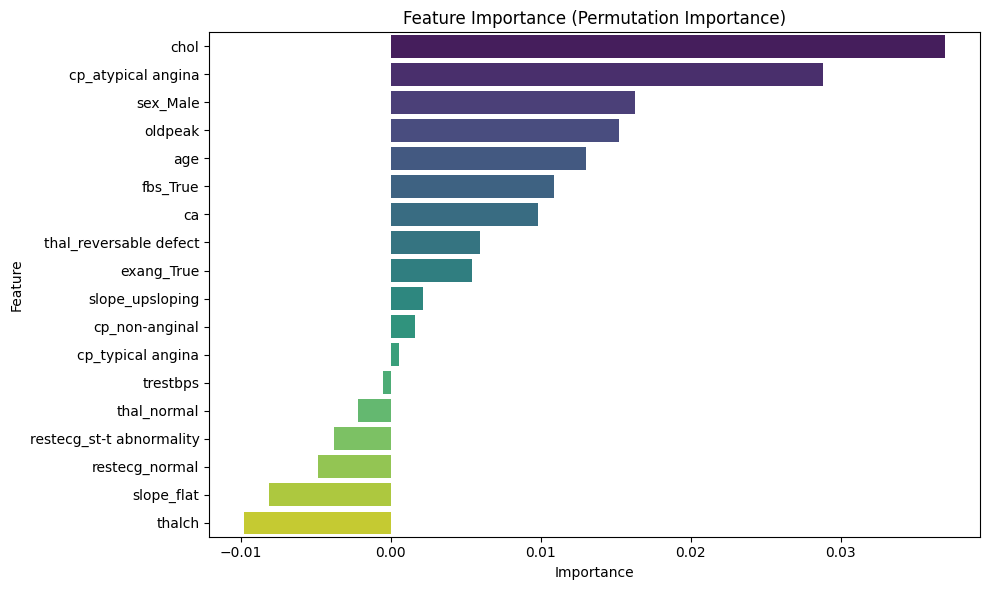


[Ethical Considerations]
✔ Data anonymized and from a public dataset (UCI).
✔ Categorical and missing values handled responsibly.
✔ In real applications, ensure legal compliance (e.g., HIPAA/GDPR).


In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import os

# 2. Load the Dataset
df = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")

# 3. Preprocessing
# Convert 'num' to binary classification target (0: No disease, 1: Disease)
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

# Drop unused columns
df.drop(columns=["id", "dataset", "num"], inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and target
X = df_imputed.drop("target", axis=1)
y = df_imputed["target"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train RandomForest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Feature Importance using permutation importance
perm = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance (Permutation Importance)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Ethical Note
print("\n[Ethical Considerations]")
print("✔ Data anonymized and from a public dataset (UCI).")
print("✔ Categorical and missing values handled responsibly.")
print("✔ In real applications, ensure legal compliance (e.g., HIPAA/GDPR).")
